In [1]:
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
from astropy.table import Table
import hdbscan
import seaborn as sns

In [2]:
# Read the data
mag = []
tab = Table.read("../JPLUS_data_6arc.tab", format="ascii.tab")
#tab = Table.read("TAP_DR1SPLUS_HA_r_03.tab", format="ascii.tab")
for da in tab:
    mag.append(da["uJAVA_MAG_APER_6_0"])
    mag.append(da["J0378_MAG_APER_6_0"])
    mag.append(da["J0395_MAG_APER_6_0"])
    mag.append(da["J0410_MAG_APER_6_0"])
    mag.append(da["J0430_MAG_APER_6_0"])
    mag.append(da["gSDSS_MAG_APER_6_0"])
    mag.append(da["J0515_MAG_APER_6_0"])
    mag.append(da["rSDSS_MAG_APER_6_0"])
    mag.append(da["J0660_MAG_APER_6_0"])
    mag.append(da["iSDSS_MAG_APER_6_0"])
    mag.append(da["J0861_MAG_APER_6_0"])
    mag.append(da["zSDSS_MAG_APER_6_0"])

In [3]:
shape = (len(tab["Number"]), 12)
mag_matrix = np.array(mag).reshape(shape)
mag_matrix.shape

(259461, 12)

In [4]:
# Standarized the data
mag_matrix_stand = StandardScaler().fit_transform(mag_matrix)
mag_matrix_stand.shape

(259461, 12)

In [239]:
clusterer = hdbscan.HDBSCAN(min_samples=20, min_cluster_size=80, prediction_data=True).fit(mag_matrix_stand)
labels = clusterer.labels_

In [244]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster = list(labels).count(1)
n_noise_ = list(labels).count(-1)

In [245]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points: %d' % n_cluster)
print('Estimated number of noise points: %d' % n_noise_)

# Add labels
tab['DBSCAN_opt_labels'] = labels

Estimated number of clusters: 2
Estimated number of cluster points: 154
Estimated number of noise points: 20813


In [242]:
# Colors
r_i = tab["rSDSS_MAG_APER_6_0"] - tab["iSDSS_MAG_APER_6_0"]
r_ha = tab["rSDSS_MAG_APER_6_0"] - tab["J0660_MAG_APER_6_0"]

/home/luis/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:1039: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


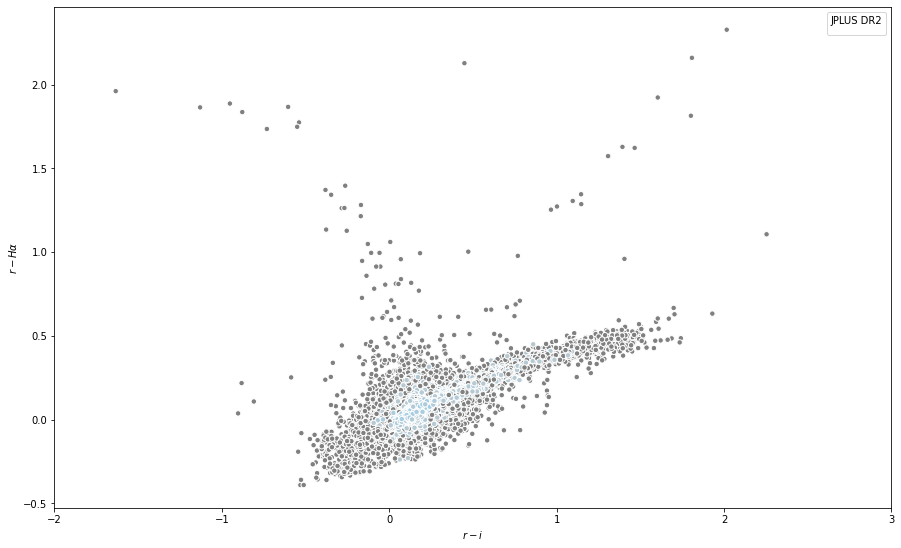

In [243]:
import matplotlib.pyplot as plt
%matplotlib inline

color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

fig, ax = plt.subplots(figsize=(15, 15))
levels = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 1.0])
GAMMA = 0.05
scatter = ax.scatter(
    r_i,
    r_ha,
    s=30,
    c=cluster_member_colors,
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic",
)
ax.set(
    xlim=[-2.0, 3.0],
    #ylim=[ymin, ymax],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$",
)
ax.legend(*scatter.legend_elements(), ncol=2, title="JPLUS DR2")
ax.set_aspect("equal")